Three Observable Trends
------------------------------------
    1.)
    2.)
    3.)

In [1]:
#dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from scipy import stats

#import api key
from config import weather_api_key

#incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#output file (csv)
output_data_file = "output_data/cities.csv"

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#lat_range = (-10, 4)
#lng_range = (1, 2)

#formatting for bold text
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [2]:
#printing out the minneapolis json to see the data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "minneapolis").json()
response

{'coord': {'lon': -93.26, 'lat': 44.98},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'},
  {'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 32.9,
  'feels_like': 25.03,
  'temp_min': 32,
  'temp_max': 34,
  'pressure': 1013,
  'humidity': 86},
 'visibility': 2414,
 'wind': {'speed': 6.93, 'deg': 160},
 'rain': {'1h': 0.42},
 'snow': {'1h': 0.25},
 'clouds': {'all': 90},
 'dt': 1579740527,
 'sys': {'type': 1,
  'id': 4984,
  'country': 'US',
  'sunrise': 1579700584,
  'sunset': 1579734337},
 'timezone': -21600,
 'id': 5037649,
 'name': 'Minneapolis',
 'cod': 200}

In [3]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

#create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add a one second interval between queries to stay within API query limits
time.sleep(1)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

608

In [4]:
#Perform API Calls
#write something more descriptive...

#base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#build partial query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_info = []

#in order to print the print log according to how the homework looks (change comment before final draft)
i = 1
set_number = 1

print("Beginning Data Retrieval") 
print("--------------------------------")

for j, city in enumerate(cities):
    
    if (j % 50 == 0 and j >= 50):
        set_number = set_number + 1
        i = 0
    print(f"Processing Record {i} of Set {set_number} | {city}")
    i=i+1
   
    response = requests.get(query_url + city).json()
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    
    try:
        lat = response['coord']['lat']
        name = response['name']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lngs = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        city_info.append({"City": name,
                          "Cloudiness": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Lat": lat,
                          "Lng": lngs,
                          "Max Temp": max_temp,
                          "Wind Speed": wind_speed})
    except:
        print("City " + color.BOLD + "not " + color.END + "found. Skipping...")
        pass

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | ardakan
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | ostrovnoy
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | san quintin
Processing Record 10 of Set 1 | camacha
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | plettenberg bay
Processing Record 13 of Set 1 | manggar
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | huarmey
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | nantucket
Processing Record 19 of Set 1 | coos bay
Processing Record 20 of Set 1 | solnechnyy
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | turkmenabat
Processing Record 23 of Set 1 | barent

Processing Record 36 of Set 4 | pangnirtung
Processing Record 37 of Set 4 | kautokeino
Processing Record 38 of Set 4 | half moon bay
Processing Record 39 of Set 4 | ngunguru
Processing Record 40 of Set 4 | bahia honda
Processing Record 41 of Set 4 | cap malheureux
Processing Record 42 of Set 4 | guerrero negro
Processing Record 43 of Set 4 | lagoa
Processing Record 44 of Set 4 | zyryanka
Processing Record 45 of Set 4 | north bend
Processing Record 46 of Set 4 | soure
Processing Record 47 of Set 4 | heinola
Processing Record 48 of Set 4 | cancun
Processing Record 49 of Set 4 | kodiak
Processing Record 0 of Set 5 | barahona
Processing Record 1 of Set 5 | vila franca do campo
Processing Record 2 of Set 5 | broome
Processing Record 3 of Set 5 | niquelandia
Processing Record 4 of Set 5 | tazovskiy
Processing Record 5 of Set 5 | avera
Processing Record 6 of Set 5 | grand centre
City not found. Skipping...
Processing Record 7 of Set 5 | nhulunbuy
Processing Record 8 of Set 5 | qui nhon
Proces

Processing Record 19 of Set 8 | tucupita
Processing Record 20 of Set 8 | santa cruz
Processing Record 21 of Set 8 | olafsvik
Processing Record 22 of Set 8 | shenkursk
Processing Record 23 of Set 8 | daryapur
Processing Record 24 of Set 8 | pringsewu
Processing Record 25 of Set 8 | vostok
Processing Record 26 of Set 8 | kijang
Processing Record 27 of Set 8 | roald
Processing Record 28 of Set 8 | grand gaube
Processing Record 29 of Set 8 | betioky
Processing Record 30 of Set 8 | paita
Processing Record 31 of Set 8 | seymchan
Processing Record 32 of Set 8 | tiznit
Processing Record 33 of Set 8 | antsohihy
Processing Record 34 of Set 8 | komsomolskiy
Processing Record 35 of Set 8 | ugljevik
Processing Record 36 of Set 8 | hervey bay
Processing Record 37 of Set 8 | larap
Processing Record 38 of Set 8 | lasa
Processing Record 39 of Set 8 | zinder
Processing Record 40 of Set 8 | hvolsvollur
Processing Record 41 of Set 8 | santa maria
Processing Record 42 of Set 8 | taiyuan
Processing Record 4

Processing Record 2 of Set 12 | abiy adi
City not found. Skipping...
Processing Record 3 of Set 12 | doha
Processing Record 4 of Set 12 | xining
Processing Record 5 of Set 12 | oreanda
City not found. Skipping...
Processing Record 6 of Set 12 | danane
Processing Record 7 of Set 12 | nuuk
Processing Record 8 of Set 12 | labuhan
Processing Record 9 of Set 12 | imbituba
Processing Record 10 of Set 12 | morondava
Processing Record 11 of Set 12 | colomiers
Processing Record 12 of Set 12 | uitenhage
Processing Record 13 of Set 12 | chinsali
Processing Record 14 of Set 12 | kalmunai
Processing Record 15 of Set 12 | rabo de peixe
Processing Record 16 of Set 12 | mandalgovi
Processing Record 17 of Set 12 | yemelyanovo
Processing Record 18 of Set 12 | dicabisagan
Processing Record 19 of Set 12 | qibili
City not found. Skipping...
Processing Record 20 of Set 12 | hakvik
City not found. Skipping...
Processing Record 21 of Set 12 | tombouctou
Processing Record 22 of Set 12 | bodden town
Processing 

In [5]:
#export the city data into a csv
#display the dataframe

city_df = pd.DataFrame(city_info)

city_df.to_csv('cities.csv', encoding="utf-8", index_label="City_ID")

city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,1,US,1579740843,73,42.60,-73.97,27.00,4.70
1,Ardakan,68,IR,1579740844,81,32.31,54.02,47.12,11.23
2,Carnarvon,0,AU,1579740845,53,-24.87,113.63,75.20,18.34
3,Ostrovnoy,100,RU,1579740847,77,68.05,39.51,25.88,23.42
4,Hermanus,0,ZA,1579740848,85,-34.42,19.23,69.01,8.01
...,...,...,...,...,...,...,...,...,...
547,Bambanglipuro,91,ID,1579741592,83,-7.95,110.28,77.97,4.72
548,Nome,90,US,1579741593,91,64.50,-165.41,3.20,3.36
549,Wakkanai,40,JP,1579741349,54,45.41,141.67,28.40,11.41
550,Longavi,10,CL,1579741597,60,-35.97,-71.68,69.30,1.36


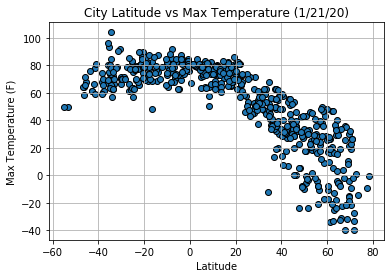

In [6]:
#plot latitude v temperature
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Max Temperature (1/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Temp_v_Latitude.png"))

#for reference on setting limits:
#plt.xlim(-50, 35)
#plt.ylim(20, 100)

**CODE:**  This code is utilizing www.openweathermap.org to gather data on cities around the globe.  We specifically called for info on city name, latitudes, longitudes, cloudiness, humidity, wind speed, country and date.  For the above scatter plot, we looked at max temperature versus the city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

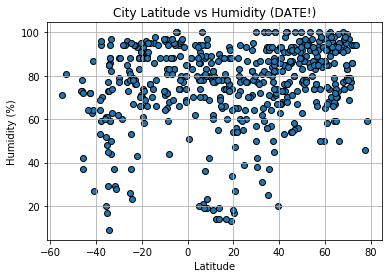

In [7]:
#plot latitude v humidity
x_values = city_df["Lat"]
y_values = city_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Humidity (DATE!)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Humidity_v_Latitude.png"))

**CODE:**  For the above scatter plot, we looked at humidity relative to city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

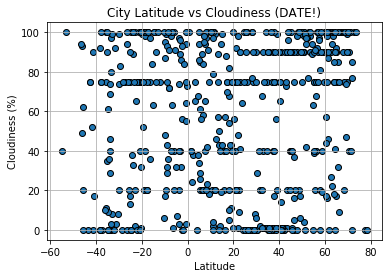

In [8]:
#plot latitude v cloudiness
x_values = city_df["Lat"]
y_values = city_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Cloudiness (DATE!)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Cloudiness_v_Latitude.png"))

**CODE:**  For the above scatter plot, we looked at cloudiness versus the city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

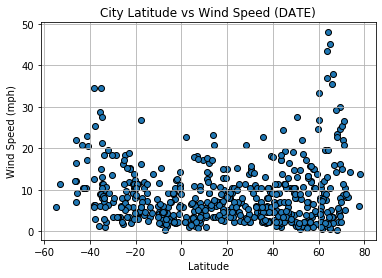

In [9]:
#plot latitude v wind speed
x_values = city_df["Lat"]
y_values = city_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Wind Speed (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Wind_Speed_v_Latitude.png"))

**CODE:**  For the above scatter plot, we looked at wind speed versus the city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

In [10]:
#run linear regressions on the above relationships, by hemisphere
#max temp (F) v latitude
#humidity (%) v latitude
#cloudiness (%) v latitude
#wind speed (mph) v latitude

In [11]:
#create northern hemisphere dataframe

#logic test/conditional statement returns a series of boolean values; make sure on the right track
northern_hem = city_df["Lat"] >= 0

#locate where the 'Lat' values are >= 0; reset index for cleaner formatting
northern_df = city_df.loc[city_df["Lat"] >= 0, :].reset_index()

#get rid of newly created 'index' column resulting from above code
northern_df = northern_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,1,US,1579740843,73,42.60,-73.97,27.00,4.70
1,Ardakan,68,IR,1579740844,81,32.31,54.02,47.12,11.23
2,Ostrovnoy,100,RU,1579740847,77,68.05,39.51,25.88,23.42
3,Talnakh,75,RU,1579740852,83,69.49,88.40,-4.00,24.61
4,San Quintin,0,MX,1579740835,77,30.48,-115.95,59.14,15.08
...,...,...,...,...,...,...,...,...,...
366,Elverum,100,NO,1579741590,75,60.88,11.56,28.00,1.01
367,Kumta,19,IN,1579741591,66,14.42,74.40,74.35,7.40
368,Nome,90,US,1579741593,91,64.50,-165.41,3.20,3.36
369,Wakkanai,40,JP,1579741349,54,45.41,141.67,28.40,11.41


In [12]:
#create southern hemisphere dataframe

#logic test for my own knowledge; not necessarily needed to create the dataframe
southern_hem = city_df["Lat"] < 0

#create southern hemisphere dataframe
southern_df = city_df.loc[city_df["Lat"] < 0, :].reset_index()
southern_df = southern_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Carnarvon,0,AU,1579740845,53,-24.87,113.63,75.20,18.34
1,Hermanus,0,ZA,1579740848,85,-34.42,19.23,69.01,8.01
2,Mataura,93,NZ,1579740849,73,-46.19,168.86,64.00,11.99
3,Kavieng,0,PG,1579740850,79,-2.57,150.80,83.23,12.24
4,Hithadhoo,3,MV,1579740855,80,-0.60,73.08,84.31,14.34
...,...,...,...,...,...,...,...,...,...
176,Caucaia,40,BR,1579741578,74,-3.74,-38.65,84.20,9.17
177,Pitimbu,40,BR,1579741373,88,-7.47,-34.81,80.60,4.70
178,Santiago,3,CL,1579741451,50,-33.46,-70.65,75.20,5.82
179,Bambanglipuro,91,ID,1579741592,83,-7.95,110.28,77.97,4.72


Text(0, 0.5, 'Max Temperature')

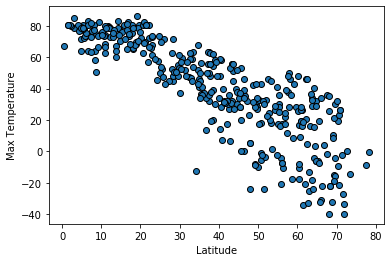

In [13]:
#run linear regression on max temp v latitude (northern hemisphere)

#first create scatter plot
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

In [14]:
#perform a linear regression on temp v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      35.105168
1      48.191250
2       2.739688
3       0.908400
4      50.518513
         ...    
366    11.857979
367    70.942466
368     7.254323
369    31.531612
370    33.642681
Name: Lat, Length: 371, dtype: float64


In [15]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.27x +89.28


The r-squared is: -0.8433686152743413


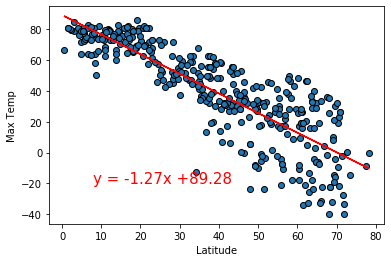

<Figure size 432x288 with 0 Axes>

In [16]:
#create plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(8,-20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save plot to images folder
plt.savefig(os.path.join("Images","Northern_Temp_v_Latitude.png"))

Text(0, 0.5, 'Max Temperature')

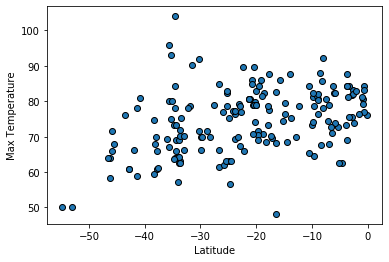

In [17]:
#run linear regression on max temp v lat (southern hemisphere)

#create scatter plot
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

In [18]:
#perform a linear regression on temp v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      73.734258
1      71.051677
2      67.745500
3      79.998297
4      80.551667
         ...    
176    79.669646
177    78.621894
178    71.321339
179    78.487062
180    70.616284
Name: Lat, Length: 181, dtype: float64


In [19]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.28x +80.72


The r-squared is: 0.4059415094366744


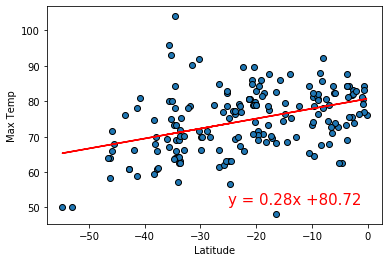

<Figure size 432x288 with 0 Axes>

In [20]:
#create plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-25,51),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Southern_Temp_v_Latitude.png"))

**ANALYSIS:**
**_Max Temp v Latitude_**     
The linear regressions for both hemispheres follow what common sense would dictate.  As you approach the equator, heading south, the max temperatures increase.  Similary, approaching the equator heading north, the max temps increase.  For both hemispheres, the farther distance a location is from the equator, the colder the max temperature.  The reason that the linear regressions have opposite-signed slopes is due to the nature of the latitude coordinates (ie North Pole is at 90 degrees, South Pole is at -90 degrees).  Finally, our r-values do indicate there is a correlation.  

Text(0, 0.5, 'Humidity')

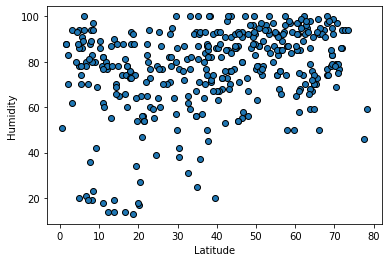

In [21]:
#run linear regression on humidity v lat (northern hemisphere)

#create scatter plot
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [22]:
#perform a linear regression on humidity v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      77.562992
1      74.803005
2      84.389197
3      84.775435
4      74.312162
         ...    
366    82.466058
367    70.004545
368    83.437016
369    78.316691
370    77.871445
Name: Lat, Length: 371, dtype: float64


In [23]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.27x +66.14


The r-squared is: 0.2953884903956409


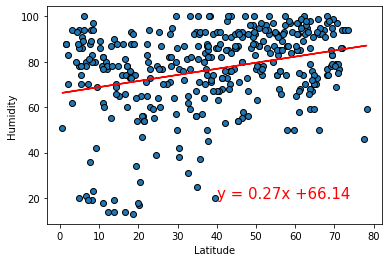

<Figure size 432x288 with 0 Axes>

In [24]:
#create Plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save plot to images folder
plt.savefig(os.path.join("Images","Northern_Humidity_v_Latitude.png"))

Text(0, 0.5, 'Humidity')

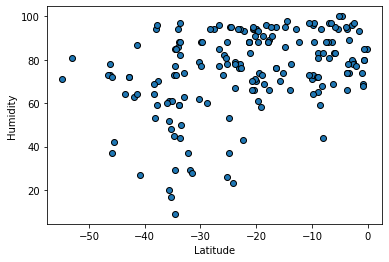

In [25]:
#plot linear regression on humidity v lat (southern hemisphere)

#create scatter plot
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [26]:
#perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      73.628766
1      68.628436
2      62.465725
3      85.304930
4      86.336412
         ...    
176    84.692324
177    82.739316
178    69.131087
179    82.487990
180    67.816864
Name: Lat, Length: 181, dtype: float64


In [27]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.52x +86.65


The r-squared is: 0.36718444052594706


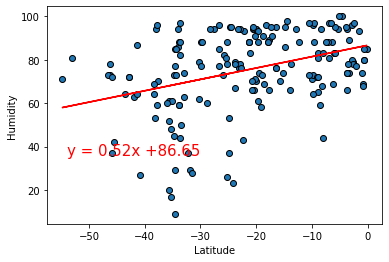

<Figure size 432x288 with 0 Axes>

In [28]:
#create plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-54,36),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save to Images Folder
plt.savefig(os.path.join("Images","Southern_Humidity_v_Latitude.png"))

**ANALYSIS:**
**_Humidity v Latitude_**     
The r-values are low, indicating there is not a strong correlation between humidity latitude.  Perhaps there would be a stronger correlation if we narrowed down latitude and added in longitutde.  But across the entirety of the globe, our r-value indicates there is not a strong correlation.

Text(0, 0.5, 'Cloudiness')

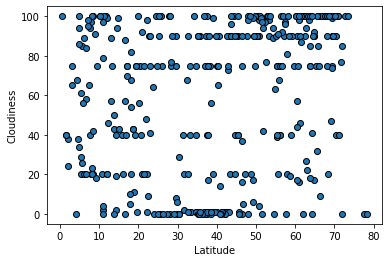

In [29]:
#plot cloudiness v lat linear regression (northern hemisphere)

x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [30]:
#perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      58.735705
1      54.752977
2      68.586086
3      69.143436
4      54.044679
         ...    
366    65.810949
367    47.828682
368    67.212064
369    59.823311
370    59.180811
Name: Lat, Length: 371, dtype: float64


In [31]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.39x +42.25


The r-squared is: 0.20891739524942096


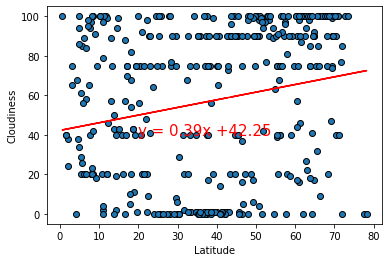

<Figure size 432x288 with 0 Axes>

In [32]:
#create Plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Northern_Cloudiness_v_Latitude.png"))

Text(0, 0.5, 'Cloudiness')

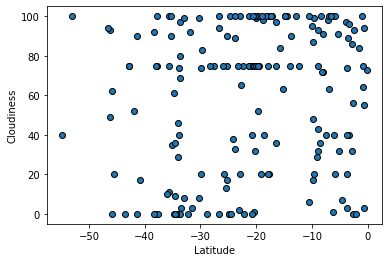

In [33]:
#plot cloudiness v lat linear regression (southern hemisphere)

x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [34]:
#perform a linear regression on cloudiness v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      54.734865
1      49.802085
2      43.722627
3      66.253294
4      67.270842
         ...    
176    65.648964
177    63.722339
178    50.297946
179    63.474409
180    49.001477
Name: Lat, Length: 181, dtype: float64


In [35]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.52x +67.58


The r-squared is: 0.1821203398390512


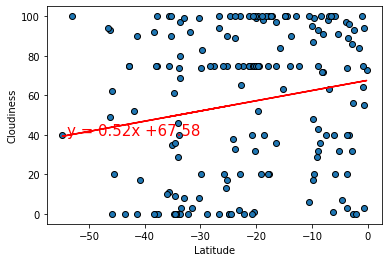

<Figure size 432x288 with 0 Axes>

In [36]:
#create Plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-54,40),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Southern_Cloudiness_v_Latitude.png"))

**ANALYSIS:**
**_Cloudiness v Latitude_**     
Similar to humidity v latitude, our r-values are low for both hemispheres when charting humidity v latitude.  Again, my guess is we could correlate cloudiness with other markers, just not latitude (alone).

Text(0, 0.5, 'Wind Speed')

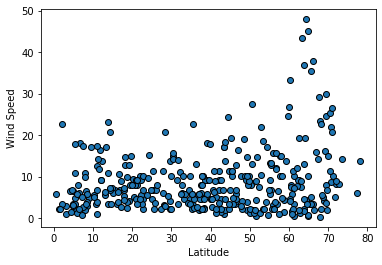

In [37]:
#plot wind speed v lat linear regression (northern hemisphere)

x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [38]:
#perform a linear regression on wind speed v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0       8.930479
1       8.123048
2      10.927478
3      11.040471
4       7.979453
         ...    
366    10.364865
367     6.719264
368    10.648918
369     9.150973
370     9.020717
Name: Lat, Length: 371, dtype: float64


In [39]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.08x +5.59


The r-squared is: 0.21931361867580587


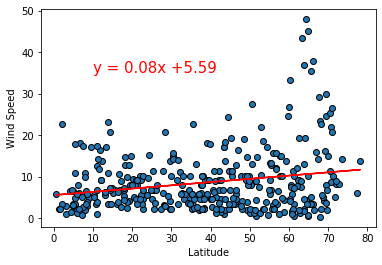

<Figure size 432x288 with 0 Axes>

In [40]:
#create Plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,35),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Northern_WindSpeed_v_Latitude.png"))

Text(0, 0.5, 'Wind Speed')

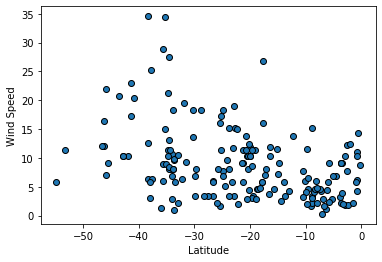

In [41]:
#plot wind speed v lat linear regression (southern hemisphere)

x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [42]:
#perform a linear regression on wind speed v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0       9.544363
1      11.323273
2      13.515710
3       5.390468
4       5.023510
         ...    
176     5.608408
177     6.303207
178    11.144451
179     6.392618
180    11.611997
Name: Lat, Length: 181, dtype: float64


In [43]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.19x +4.91


The r-squared is: -0.3921773669628749


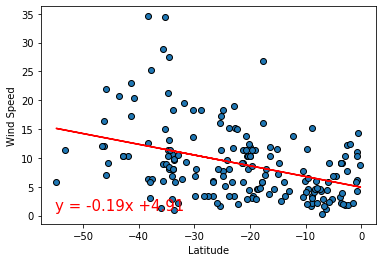

<Figure size 432x288 with 0 Axes>

In [44]:
#create plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-55,1),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save scatter plot to images folder
plt.savefig(os.path.join("Images","Southern_WindSpeed_v_Latitude.png"))

**ANALYSIS:**
**_Wind Speed v Latitude_**     
Yet again, we have low r-values, indicating a weak correlation between wind speed and latitude, across both hemispheres.  When looking at the relationships we've analyzed, the strongest correlation appears between temperature and latitude.
